<a href="https://colab.research.google.com/github/dsgustavomoreira/Classificacao-Risco-do-Cliente/blob/main/Classifica%C3%A7%C3%A3o_de_Risco_do_Cliente_com_KNN_e_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º - Problema de Negócio

O objetivo deste caso é desenvolver um **Sistema de Classificação de Risco do Cliente** para a aprovação de empréstimos bancários. Para tanto, será utilizada a base "risco.csv", originada por meio dos dados da UCI Machine Learning.

**Arquitetura dos Dados**:

* **id_cliente**: Número de identificação única do cliente
* **anot_cadastrais**: Índice referente às anotações externas à empresa, tais como anotações SERASA/SPC/BACEN
* **indice_inad**: Índice de inadimplência do cliente
* **class_renda**: Índice referente à classificação do cliente de acordo com sua renda
* **saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **risco**: Risco do cliente atribuído conforme as variáveis de análise do cliente

# 2º - Análise Exploratória dos Dados:


In [ ]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/risco.csv')

In [ ]:
dataset.head(7)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
5,5,5.4,3.9,1.7,0.4,Risco_Alto
6,6,4.6,3.4,1.4,0.3,Risco_Alto


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset['Risco'].value_counts()

Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

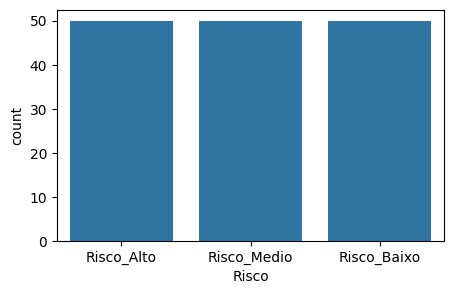

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset, x='Risco')
plt.show()

In [ ]:
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

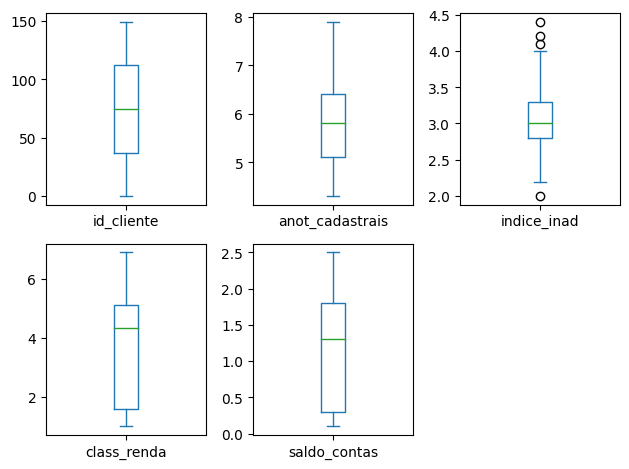

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

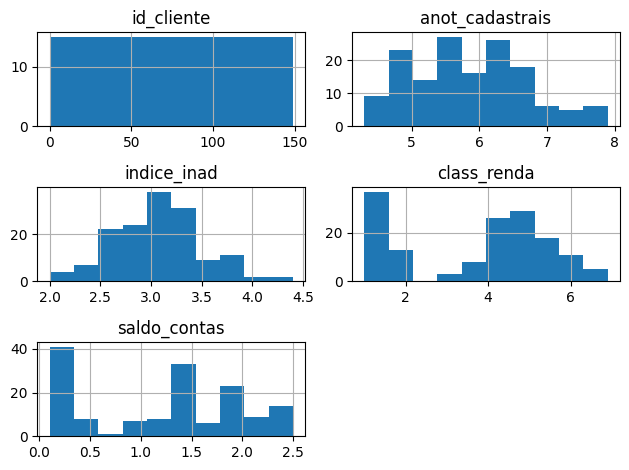

In [ ]:
dataset.hist()
plt.tight_layout()
plt.show()

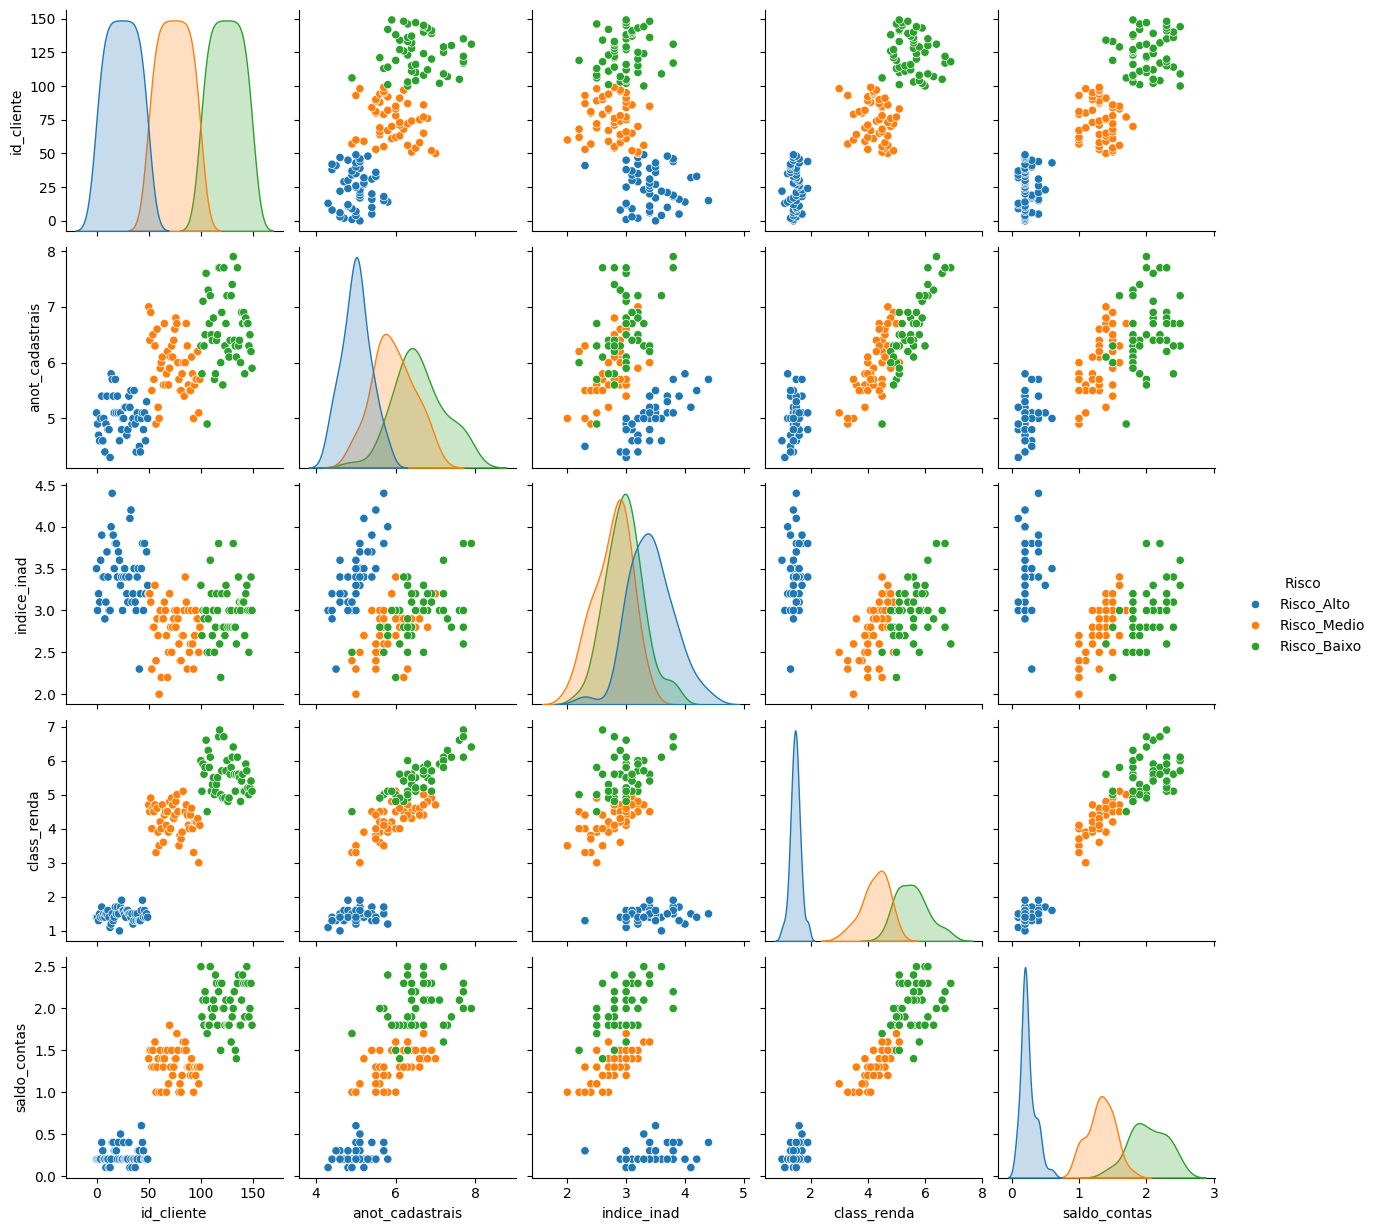

In [ ]:
sns.pairplot(dataset, hue='Risco', kind='scatter')

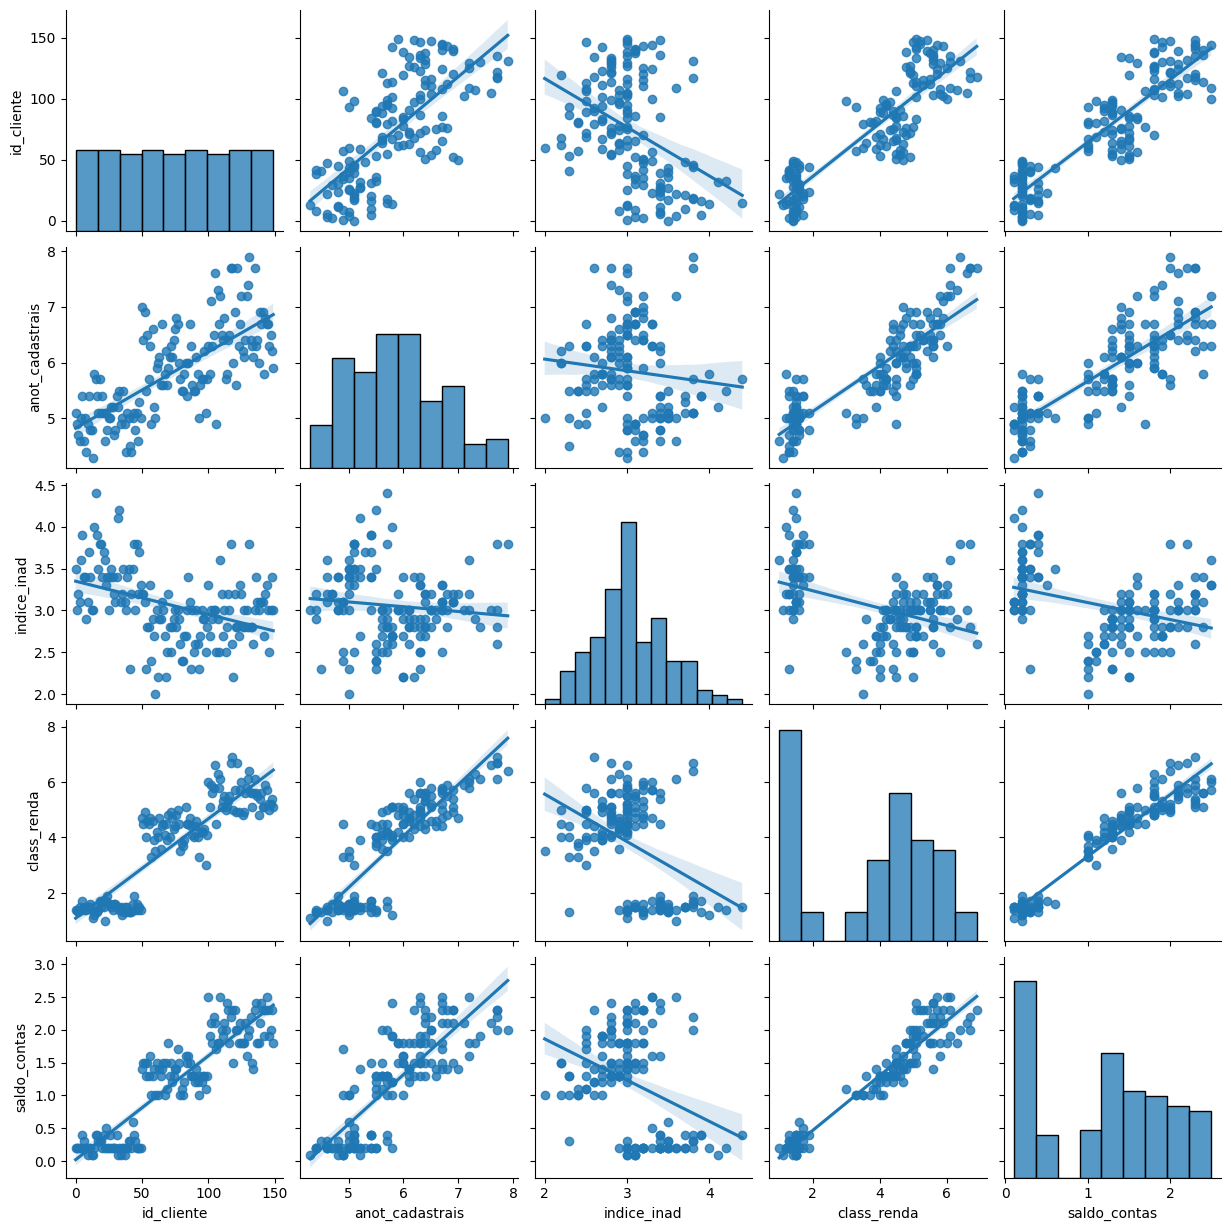

In [ ]:
sns.pairplot(dataset, kind='reg')

# 3º - Pré-Processamento dos Dados:

In [ ]:
dataset.drop(['id_cliente'], inplace=True, axis=1)

In [ ]:
X = dataset.drop(['Risco'], axis=1)
y = dataset['Risco']

In [ ]:
X

,anot_cadastrais,indice_inad,class_renda,saldo_contas
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0       Risco_Alto
1       Risco_Alto
2       Risco_Alto
3       Risco_Alto
4       Risco_Alto
          ...     
145    Risco_Baixo
146    Risco_Baixo
147    Risco_Baixo
148    Risco_Baixo
149    Risco_Baixo
Name: Risco, Length: 150, dtype: object

In [ ]:
X.dtypes

anot_cadastrais    float64
indice_inad        float64
class_renda        float64
saldo_contas       float64
dtype: object

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X

,anot_cadastrais,indice_inad,class_renda,saldo_contas
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test =  sc.transform(x_test)

# 4º - Pré-Processamento dos Dados: KNN

In [ ]:
modelo_knn = KNeighborsClassifier(n_neighbors=30)

In [ ]:
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
previsoes_knn = modelo_knn.predict(x_test)

In [ ]:
modelo_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

# 5º - Avaliando a Máquina Preditiva: KNN

In [ ]:
print('Acurácia do Modelo KNN =', accuracy_score(y_test, previsoes_knn)*100)

Acurácia do Modelo KNN = 80.0


In [ ]:
print(confusion_matrix(y_test, previsoes_knn))
print(classification_report(y_test, previsoes_knn))

[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



# 6º - Pré-Processamento dos Dados: SVC

In [ ]:
modelo_svc = SVC(kernel='linear', gamma=1e-5, C=10, random_state=0)

In [ ]:
modelo_svc.fit(X_train, y_train)

SVC(C=10, gamma=1e-05, kernel='linear', random_state=0)

In [ ]:
previsoes_svc = modelo_svc.predict(x_test)

In [ ]:
modelo_svc.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1e-05,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 7º - Avaliando a Máquina Preditiva: SVC

In [ ]:
print('Acurácia do Modelo SVC =', accuracy_score(previsoes_svc, y_test)*100)

Acurácia do Modelo SVC = 93.33333333333333


In [ ]:
print(classification_report(previsoes_svc, y_test))
print(confusion_matrix(previsoes_svc, y_test))

              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       1.00      0.85      0.92        13
 Risco_Medio       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 7  0  0]
 [ 0 11  2]
 [ 0  0 10]]
